In [144]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## 학습 관련 함수 정의
- 손실 계산 함수 -> 베이스 모델 함수와 동일한 지표
- 정확도 계산 함수 -> 베이스 모델 함수와 동일한 지표

In [9]:
# loss
def mse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [10]:
# 정확도 계산
def eval_accuracy(y, y_hat):
	# 오차율 구하는 과정    
	# np.mean() 메서드의 이유는 미니배치 처리를 고려하여 하나의 지표로 묶어주기 위함 입니다. 
    mdiff = np.mean(np.abs((y_hat - y) / y))
    # 1 에서 오차율을 빼 정확도를 구합니다. 
    return 1 - mdiff

## OnehotEncoder

### 데이터 불러오기

In [79]:
path = "/content/drive/MyDrive/team_project1/data/"

In [80]:
df = pd.read_csv(path + "Regression_data_onehot.csv")
print(df.shape)
df.head()

(4177, 11)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [81]:
# 데이터 나누기
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3341, 10), (836, 10))

### 선형 회귀 모델 간의 비교

#### 기본 선형 모델

In [82]:
# 모델 정의
lr = LinearRegression()

In [83]:
# 학습
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
# 예측
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [85]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss= {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 4.712, Accuracy = 0.841 / Test - Loss= 4.907, Accuracy = 0.839


#### 릿지 선형 모델

In [88]:
# 모델 정의 
ridge = Ridge()

In [89]:
ridge.fit(X_train, y_train)

Ridge()

In [90]:
# 예측
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [91]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss= {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 4.780, Accuracy = 0.841 / Test - Loss= 4.805, Accuracy = 0.840


Text(0.5, 1.0, 'The coefficient value predicted by the Ridge model')

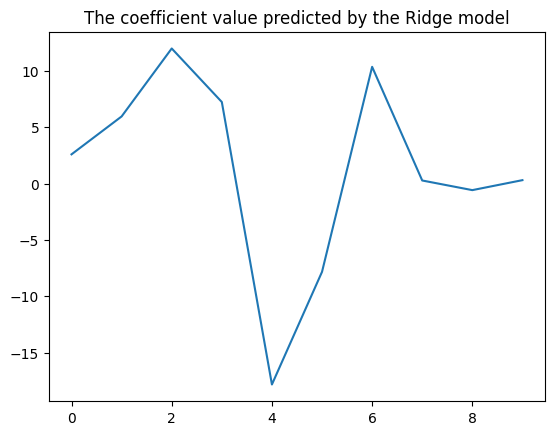

In [92]:
plt.plot(ridge.coef_)
plt.title("The coefficient value predicted by the Ridge model")

#### 라쏘 선형 모델

In [93]:
lasso = Lasso()

In [94]:
# 훈련
lasso.fit(X_train, y_train)

Lasso()

In [95]:
# 예측
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [96]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 10.599, Accuracy = 0.729 / Test - Loss = 9.569, Accuracy = 0.742


Text(0.5, 1.0, 'The coefficient value predicted by the Lasso model')

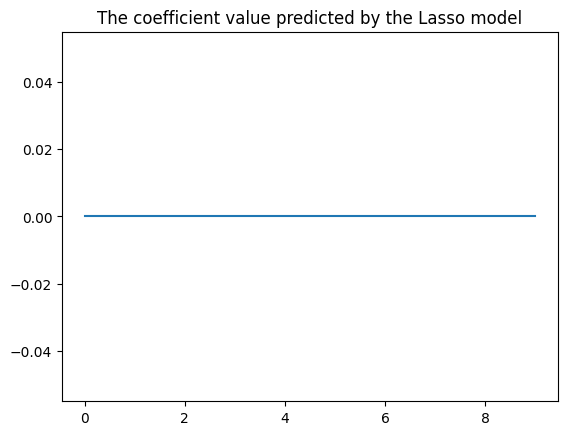

In [97]:
plt.plot(lasso.coef_)
plt.title("The coefficient value predicted by the Lasso model")

#### alpha 값에 따른 릿지 모델 성능 변화
- 기본적으로 alpha = 1.0

In [98]:
alpha = [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
len(alpha)

16

In [99]:
ridge_train_acc = []
ridge_test_acc = []

for a in alpha:
  # 모델 정의
  ridge_alpha = Ridge(alpha=a)
  # 훈련
  ridge_alpha.fit(X_train, y_train)
  # 예측
  y_train_pred = ridge_alpha.predict(X_train)
  y_test_pred = ridge_alpha.predict(X_test)

  # 결과 저장
  ridge_train_acc.append(eval_accuracy(y_train, y_train_pred))
  ridge_test_acc.append(eval_accuracy(y_test, y_test_pred))


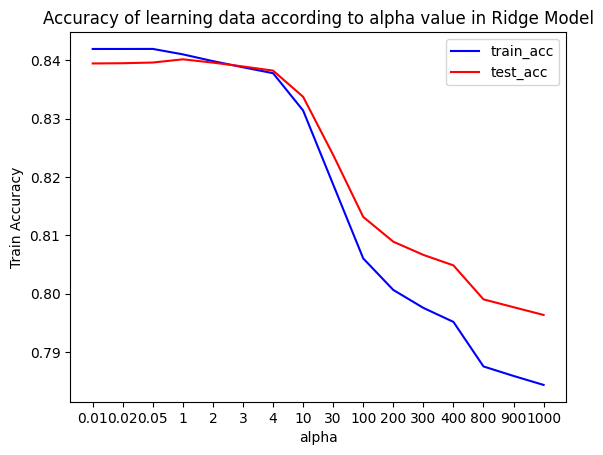

In [100]:
plt.plot(ridge_train_acc, 'b', label='train_acc')
plt.plot(ridge_test_acc, 'r', label='test_acc')
plt.xticks(list(range(0, 16)), [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

plt.xlabel("alpha")
plt.ylabel("Train Accuracy")

plt.title("Accuracy of learning data according to alpha value in Ridge Model")

plt.legend()
plt.show()

#### alpha 값에 따른 랏쏘 모델 성능 변화
- 기본 alpha 값 = 1.0

In [101]:
lasso_train_acc = []
lasso_test_acc = []

for a in alpha:
  # 모델 정의
  lasso_alpha = Lasso(alpha=a)
  # 훈련
  lasso_alpha.fit(X_train, y_train)
  # 예측
  y_train_pred = lasso_alpha.predict(X_train)
  y_test_pred = lasso_alpha.predict(X_test)

  # 결과 저장
  lasso_train_acc.append(eval_accuracy(y_train, y_train_pred))
  lasso_test_acc.append(eval_accuracy(y_test, y_test_pred))


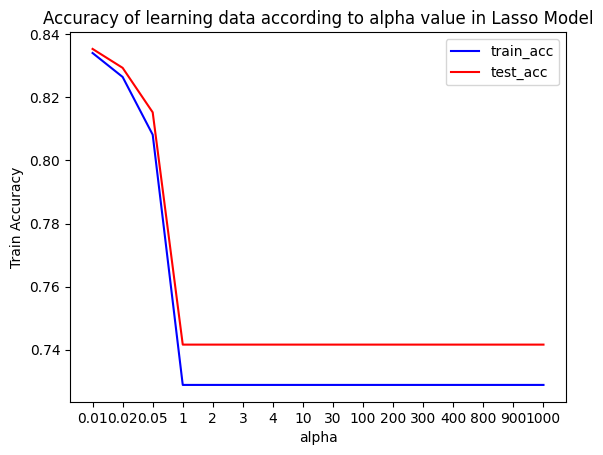

In [102]:
plt.plot(lasso_train_acc, 'b', label='train_acc')
plt.plot(lasso_test_acc, 'r', label='test_acc')
plt.xticks(list(range(0, 16)), [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

plt.xlabel("alpha")
plt.ylabel("Train Accuracy")

plt.title("Accuracy of learning data according to alpha value in Lasso Model")

plt.legend()
plt.show()

In [103]:
print(f"train_accuracy의 성능이 가장 높은 alpha: {alpha[lasso_train_acc.index(max(lasso_train_acc))]}")
print(f"test_accuracy의 성능이 가장 높은 alpha: {alpha[lasso_test_acc.index(max(lasso_test_acc))]}")

train_accuracy의 성능이 가장 높은 alpha: 0.01
test_accuracy의 성능이 가장 높은 alpha: 0.01


In [104]:
lasso_best = Lasso(alpha=0.01)

# 훈련
lasso_best.fit(X_train, y_train)

# 예측
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 5.064, Accuracy = 0.834 / Test - Loss = 4.862, Accuracy = 0.835


### 선형회귀모델 + scaler with GridSearch

In [131]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', LinearRegression())])

param_grid = [
    {'regressor': [LinearRegression],
     'preprocessing': [StandardScaler(), MinMaxScaler()]},
    {'regressor': [Lasso()],
     'preprocessing': [StandardScaler(), MinMaxScaler()],
     'regressor__alpha': [0.01, 0.02, 0.05, 1]},
     {'regressor': [Ridge()],
     'preprocessing': [StandardScaler(), MinMaxScaler()],
     'regressor__alpha': [0.01, 0.02, 0.05, 1]}]

grid = GridSearchCV(pipe, param_grid, cv=5,scoring=make_scorer(mse))

In [132]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"학습하는데 걸리는 시간: {end-start}")

학습하는데 걸리는 시간: 1.2761452198028564


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dis

In [133]:
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

최적 하이퍼파라미터 : {'preprocessing': StandardScaler(), 'regressor': Lasso(alpha=1), 'regressor__alpha': 1}


In [134]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [135]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train: 
0.08824277096692695
Test - Loss = 0.095, Accuracy = 0.892


### 트리 회귀 모델 간 성능 비교

#### 랜덤 포레스트

In [105]:
# 모델 생성
rf_model = RandomForestRegressor()

In [106]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
# 예측
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [108]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.663, Accuracy = 0.943 / Test - Loss = 4.749, Accuracy = 0.843


#### Xgboost

In [109]:
# 모델 정의
xgb = XGBRegressor()

In [110]:
# 학습
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [111]:
# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [112]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.588, Accuracy = 0.941 / Test - Loss = 5.199, Accuracy = 0.836


#### LightGBM

In [113]:
# 모델 정의
lgbm = LGBMRegressor()

In [114]:
# 학습
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [115]:
# 예측
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

In [116]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.227, Accuracy = 0.888 / Test - Loss = 4.728, Accuracy = 0.844


## LabelEncoder

### 데이터 불러오기

In [11]:
# 데이터 불러오기
path = "/content/drive/MyDrive/team_project1/data/"

In [12]:
df = pd.read_csv(path + "Regression_data_label.csv")
print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# 데이터 나누기
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3341, 8), (836, 8))

### 모델 간 성능 비교

#### 1-1. RandomForest

In [ ]:
# 모델 생성
rf_model = RandomForestRegressor()

# 학습
rf_model.fit(X_train, y_train)

# 예측
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.638, Accuracy = 0.944 / Test - Loss = 5.681, Accuracy = 0.832


#### 1-2. Xgboost

In [ ]:
# 모델 정의
xgb = XGBRegressor()

# 학습
xgb.fit(X_train, y_train)

# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.459, Accuracy = 0.947 / Test - Loss = 6.265, Accuracy = 0.825


#### 1-3. LightGBM

In [ ]:
# 모델 정의
lgbm = LGBMRegressor()

# 학습
lgbm.fit(X_train, y_train)

# 예측
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.062, Accuracy = 0.891 / Test - Loss = 5.661, Accuracy = 0.834


### 상관관계가 낮은 변수(Shucked weight) 삭제

In [ ]:
X_train_drop = X_train.drop('Shucked weight', axis=1)
X_test_drop = X_test.drop('Shucked weight', axis=1)

X_train_drop.shape, X_test_drop.shape

#### 2-1. RandomForest

In [ ]:
# 모델 생성
rf_model = RandomForestRegressor()

# 학습
rf_model.fit(X_train_drop, y_train)

# 예측
y_train_pred = rf_model.predict(X_train_drop)
y_test_pred = rf_model.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.673, Accuracy = 0.941 / Test - Loss = 6.788, Accuracy = 0.832


#### 2-2. Xgboost

In [ ]:
# 모델 정의
xgb = XGBRegressor()

# 학습
xgb.fit(X_train_drop, y_train)

# 예측
y_train_pred = xgb.predict(X_train_drop)
y_test_pred = xgb.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.730, Accuracy = 0.935 / Test - Loss = 7.396, Accuracy = 0.827


#### 2-3. LightGBM

In [ ]:
# 모델 정의
lgbm = LGBMRegressor()

# 학습
lgbm.fit(X_train_drop, y_train)

# 예측
y_train_pred = lgbm.predict(X_train_drop)
y_test_pred = lgbm.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.520, Accuracy = 0.880 / Test - Loss = 7.001, Accuracy = 0.833


### 모델 하이퍼파라미터 변경

#### 3-1. RandomForest

In [16]:
pipe = Pipeline([('preprocessing', None), ('regression', RandomForestRegressor())])

param_grid = {'preprocessing': [None, StandardScaler(), MinMaxScaler()],
              'regression__n_estimators': [100, 150, 200],
              'regression__max_depth': [None, 3, 6, 9]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(mse))

In [18]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"RandomForest 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

RandomForest 모델 학습 시간: 242.25859427452087
최적 하이퍼파라미터 : {'preprocessing': None, 'regression__max_depth': 3, 'regression__n_estimators': 100}


In [19]:
results = pd.DataFrame(grid.cv_results_)

np.transpose(results.head(10))

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,1.313356,2.281303,3.31647,0.321847,0.479556,0.852439,0.52701,0.916616,1.513008,0.7302
std_fit_time,0.235337,0.579571,1.455701,0.009992,0.009078,0.111074,0.01769,0.189479,0.641296,0.034536
mean_score_time,0.024331,0.068259,0.067053,0.010105,0.013748,0.024327,0.011549,0.019793,0.037657,0.016337
std_score_time,0.00604,0.051867,0.032024,0.001454,0.001914,0.004508,0.000171,0.007472,0.021306,0.004975
param_preprocessing,None,None,None,None,None,None,None,None,None,None
param_regression__max_depth,None,None,None,3,3,3,6,6,6,9
param_regression__n_estimators,100,150,200,100,150,200,100,150,200,100
params,"{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth...","{'preprocessing': None, 'regression__max_depth..."
split0_test_score,4.688537,4.713966,4.639907,5.521773,5.520093,5.495791,4.505338,4.501132,4.478604,4.519749
split1_test_score,5.337663,5.263732,5.223028,6.622726,6.51727,6.512421,5.395822,5.402232,5.400798,5.289531


In [20]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [21]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train: 
5.816856029261059
Test - Loss = 5.128, Accuracy = 0.835


#### 3-2. Xgboost
- eta(0.3): weak learner의 반영 수준을 나타냄. 클수록 과적합 이슈 발생 가능성 높음
- min_child_weight(1): leaf node에 포함되는 최소 관측치의 수를 의미. 작은 값을 가질수록 과적합 발생 가능성 높음
- max_depth(6): 트리의 최대 깊이를 설정. 과적합에 가장 민감하게 작용하는 파라미터 중 하나

In [31]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', XGBRegressor())])

param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
              'regression__min_child_weight': [3, 6, 9],
              'regression__max_depth': [3, 6, 9]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(mse))

In [32]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"XGB 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

XGB 모델 학습 시간: 32.768158197402954
최적 하이퍼파라미터 : {'preprocessing': MinMaxScaler(), 'regression__max_depth': 9, 'regression__min_child_weight': 6}


In [33]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [34]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train: 
5.689473458318068
Test - Loss = 4.998, Accuracy = 0.842


#### 3-3. LightGBM

In [35]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', LGBMRegressor())])

param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
              'regression__max_depth': [-1, 3, 6, 9],
              'regression__n_estimators': [100, 150, 200]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(mse))

In [36]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"LGBM 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

LGBM 모델 학습 시간: 12.39884614944458
최적 하이퍼파라미터 : {'preprocessing': MinMaxScaler(), 'regression__max_depth': -1, 'regression__n_estimators': 200}


In [37]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [38]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train: 
5.171542100183735
Test - Loss = 4.585, Accuracy = 0.847


### 추가 EDA 진행

In [136]:
df_new = pd.read_csv(path + 'reg_df.csv')

print(df_new.shape)
df_new.head(3)

(4015, 11)


,Sex_Encoded,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Volume,Density,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,0.016522,9.078932,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0.008741,8.007796,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,0.031469,6.673163,9


In [ ]:
# 데이터 나누기
X = df_new.drop('Rings', axis=1)
y = df_new['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

#### RandomForest
- RandomForest 모델 학습 시간: 266.6621069908142
- 최적의 매개변수: {'preprocessing': None, 'regression__max_depth': 9, 'regression__n_estimators': 100}
- Test - Loss = 4.738, Accuracy = 0.851

In [ ]:
pipe = Pipeline([('preprocessing', None), ('regression', RandomForestRegressor())])

param_grid = {'preprocessing': [None, StandardScaler(), MinMaxScaler()],
              'regression__n_estimators': [100, 150, 200],
              'regression__max_depth': [None, 3, 6, 9]}

grid = GridSearchCV(pipe, param_grid, cv=5)              

In [ ]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"RandomForest 모델 학습 시간: {end-start}")
print(f"최적의 매개변수: {grid.best_params_}")

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

print("Train - Loss = ", end='')
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_pred):.3f}")

#### XGB

In [ ]:
# pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', XGBRegressor())])

# param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
#               'regression__min_child_weight': [3, 6, 9],
#               'regression__max_depth': [3, 6, 9]}

# grid = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
# start = time.time()
# grid.fit(X_train, y_train)
# end = time.time()

# print(f"XGB 모델 학습 시간: {end-start}")
# print(f"최적의 매개변수: {grid.best_params_}")

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

print("Train - Loss = ", end='')
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_pred):.3f}")

#### LGBM
- LGBM 모델 학습 시간: 16.170862674713135
- 최적의 매개변수: {'preprocessing': MinMaxScaler(), 'regression__max_depth': 3, 'regression__n_estimators': 100}
- Test - Loss = 4.342, Accuracy = 0.851

In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', LGBMRegressor())])

param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
              'regression__max_depth': [-1, 3, 6, 9],
              'regression__n_estimators': [100, 150, 200]}

grid = GridSearchCV(pipe, param_grid, cv=5)            

In [ ]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"LGBM 모델 학습 시간: {end-start}")
print(f"최적의 매개변수: {grid.best_params_}")

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

print("Train - Loss = ", end='')
print(grid.best_score_)
print(f"Test - Loss = {mse(y_test, y_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_pred):.3f}")

### 추가 EDA 진행 + log(y) 적용

In [137]:
# 데이터 나누기
X = df_new.drop('Rings', axis=1)
y = df_new['Rings']

log_y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.2)

X_train.shape, X_test.shape

((3212, 10), (803, 10))

In [138]:
# loss
def mse_log(y_true, y_pred):
  y_true = np.exp(y_true)
  y_pred = np.exp(y_pred)
  return mean_squared_error(y_true, y_pred)

In [139]:
# 정확도 계산
def eval_accuracy_log(y_true, y_pred):
	# 오차율 구하는 과정    
	# np.mean() 메서드의 이유는 미니배치 처리를 고려하여 하나의 지표로 묶어주기 위함 입니다. 
  y_true = np.exp(y_true)
  y_pred = np.exp(y_pred)
  mdiff = np.mean(np.abs((y_pred - y_true) / y_true))
  
  # 1 에서 오차율을 빼 정확도를 구합니다. 
  return 1 - mdiff

#### 4-1. Xgboost

In [65]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', XGBRegressor())])

param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
              'regression__min_child_weight': [3, 6, 9],
              'regression__max_depth': [3, 6, 9]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(mse_log))

In [66]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"XGB 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

XGB 모델 학습 시간: 57.62788486480713
최적 하이퍼파라미터 : {'preprocessing': MinMaxScaler(), 'regression__max_depth': 9, 'regression__min_child_weight': 3}


In [67]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [68]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse_log(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy_log(y_test, y_test_pred):.3f}")

Train: 
5.540668155655922
Test - Loss = 5.288, Accuracy = 0.835


#### 4-2. LGBM

In [122]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regression', LGBMRegressor())])

param_grid = { 'preprocessing': [StandardScaler(), MinMaxScaler()],
              'regression__max_depth': [-1, 3, 6, 9],
              'regression__n_estimators': [100, 150, 200]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(mse_log))

In [123]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"LGBM 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

LGBM 모델 학습 시간: 17.16959309577942
최적 하이퍼파라미터 : {'preprocessing': StandardScaler(), 'regression__max_depth': -1, 'regression__n_estimators': 200}


In [124]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [72]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse_log(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy_log(y_test, y_test_pred):.3f}")

Train: 
5.028188791354262
Test - Loss = 4.849, Accuracy = 0.843


#### 4-3. linear regression

In [140]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', LinearRegression())])

param_grid = [
    {'regressor': [LinearRegression],
     'preprocessing': [StandardScaler(), MinMaxScaler()]},
    {'regressor': [Lasso()],
     'preprocessing': [StandardScaler(), MinMaxScaler()],
     'regressor__alpha': [0.01, 0.02, 0.05, 1]},
     {'regressor': [Ridge()],
     'preprocessing': [StandardScaler(), MinMaxScaler()],
     'regressor__alpha': [0.01, 0.02, 0.05, 1]}]

grid = GridSearchCV(pipe, param_grid, cv=5,scoring=make_scorer(mse_log))

In [141]:
start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"Linear Regression 모델 학습 시간: {end-start}")
print(f'최적 하이퍼파라미터 : {grid.best_params_}')

Linear Regression 모델 학습 시간: 0.7500362396240234
최적 하이퍼파라미터 : {'preprocessing': StandardScaler(), 'regressor': Lasso(alpha=1), 'regressor__alpha': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dis

In [142]:
# 예측
y_test_pred = grid.best_estimator_.predict(X_test)

In [143]:
print("Train: ")
print(grid.best_score_)
print(f"Test - Loss = {mse_log(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy_log(y_test, y_test_pred):.3f}")

Train: 
10.049469018036557
Test - Loss = 9.414, Accuracy = 0.768
